<a href="https://colab.research.google.com/github/Nithilaa/Breast-Cancer-Wisconsin-Diagnostic-Data-Set---KNN/blob/master/wbcd_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DOWNLOADING THE DATASET 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (2).csv


# IMPORTING NECESSARY LIBRARIES

In [ ]:
# numerical analysis
import numpy as np
# storing and processing in dataframes
import pandas as pd
# simple plotting
import matplotlib.pyplot as plt
# advanced plotting
import seaborn as sns

# splitting dataset into train and test
from sklearn.model_selection import train_test_split
# scaling features
from sklearn.preprocessing import StandardScaler
# selecting important features
from sklearn.feature_selection import RFECV
# k nearest neighbors model
from sklearn.neighbors import KNeighborsClassifier
# accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

# plot style
sns.set_style('whitegrid')
# color palettes
pal = ['#0e2433', '#ff007f']

# EXPLORING THE DATA

In [ ]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [ ]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# no. of rows and columns
dataset.shape

(569, 33)

In [ ]:
# columns names
dataset.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
# no. of na values in each columns
dataset.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

# VISUALISING THE DATASET

**CLASS DISTRIBUTION**

B    357
M    212
Name: diagnosis, dtype: int64


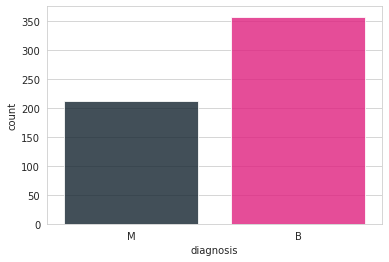

In [ ]:
# no of values in each class
print(dataset['diagnosis'].value_counts())

# plot class distribution
sns.countplot(dataset['diagnosis'], palette=pal, alpha=0.8)
plt.show()

* There is an inbalance in no. of observations in each class.
* This will possibley lead to a biased model.
* Idealy we want to have approximatly equal no. of observation all the classes.
* In this case we can bring down the no. of observation in the 'B' class to no. of obeservation in the 'M'



**CORRELATION HEATMAP**

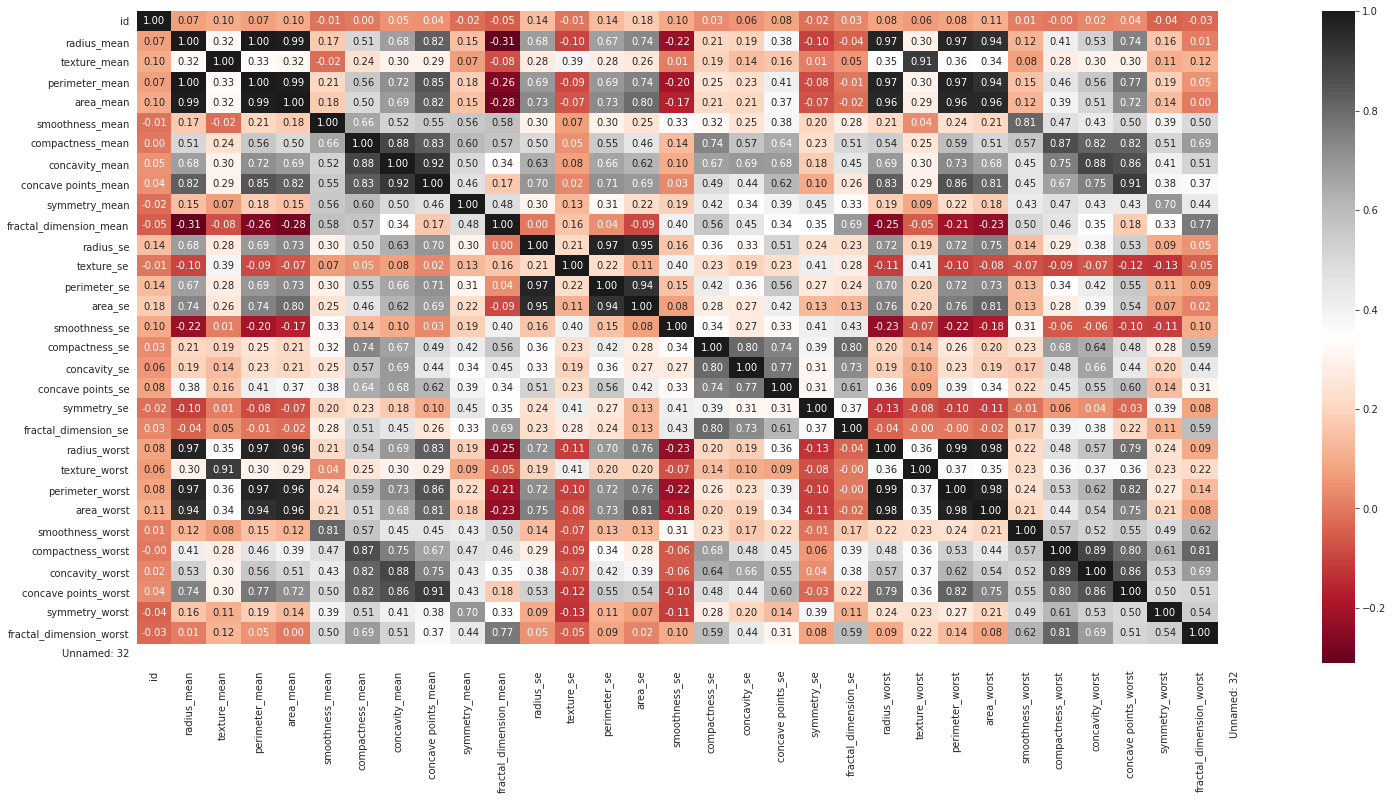

In [ ]:
# figure size
plt.figure(figsize=(25, 12))
# plot heatmap
sns.heatmap(dataset.corr(), annot=True, fmt='.2f', cmap='RdGy')
# show figure
plt.show()

# DATA PRE PROCESSING

In [ ]:
# Drop unwanted columns

dataset.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)
print(dataset.shape)

(569, 31)


In [ ]:
# encoding diagnosis data

dataset['diagnosis'] = dataset['diagnosis'].apply(lambda x: 1 if x=='M' else 0)

# ML MODEL

In [ ]:
# features and labels
X = dataset.drop(['diagnosis'], axis=1)
y = dataset['diagnosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)

**When k = 1**

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
knn.score(X_test,y_test)

0.9308510638297872

**When k = 3**

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)

knn.score(X_test,y_test)

0.9414893617021277

**When k = 5**

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)

knn.score(X_test,y_test)

0.9521276595744681

**When k = 7**

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train,y_train)

knn.score(X_test,y_test)

0.973404255319149

**When k =9**

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train,y_train)

knn.score(X_test,y_test)

0.973404255319149

# EVALUATING USING ACCURACY

In [ ]:
#Performing cross validation
neighbors = []
cv_scores = []
from sklearn.model_selection import cross_val_score
#perform 10 fold cross validation
for k in range(1,11,2):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn,X_train,y_train,cv=10, scoring = 'accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 5 


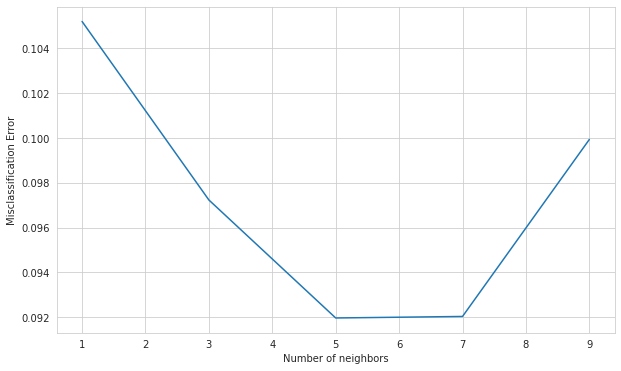

In [ ]:
#Misclassification error versus k
MSE = [1-x for x in cv_scores]

#determining the best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is %d ' %optimal_k)

#plot misclassification error versus k

plt.figure(figsize = (10,6))
plt.plot(neighbors, MSE)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()

# EVALUATING USING PRECISION

In [ ]:
#Performing cross validation
neighbors = []
cv_scores = []
from sklearn.model_selection import cross_val_score
#perform 10 fold cross validation
for k in range(1,11,2):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn,X_train,y_train,cv=10, scoring = 'precision')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 7 


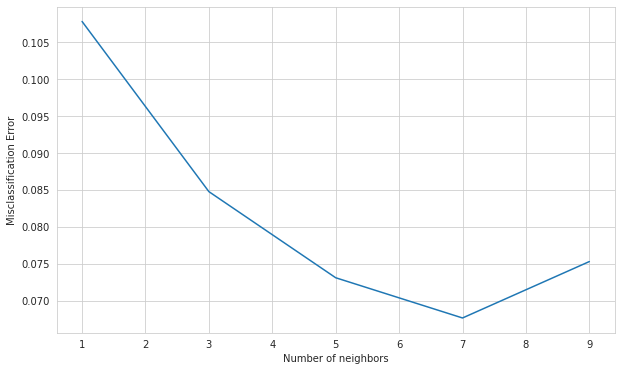

In [ ]:
#Misclassification error versus k
MSE = [1-x for x in cv_scores]

#determining the best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is %d ' %optimal_k)

#plot misclassification error versus k

plt.figure(figsize = (10,6))
plt.plot(neighbors, MSE)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()

# EVALUATING USING RECALL

In [70]:
#Performing cross validation
neighbors = []
cv_scores = []
from sklearn.model_selection import cross_val_score
#perform 10 fold cross validation
for k in range(1,11,2):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn,X_train,y_train,cv=10, scoring = 'recall')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 1 


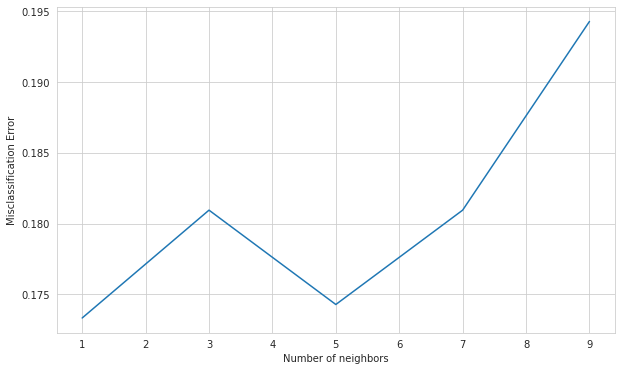

In [71]:
#Misclassification error versus k
MSE = [1-x for x in cv_scores]

#determining the best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is %d ' %optimal_k)

#plot misclassification error versus k

plt.figure(figsize = (10,6))
plt.plot(neighbors, MSE)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()

# EVALUATING USING F-MEASURE

In [81]:
#Performing cross validation
neighbors = []
cv_scores = []
from sklearn.model_selection import cross_val_score
#perform 10 fold cross validation
for k in range(1,11,2):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn,X_train,y_train,cv=10, scoring = 'f1')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 5 


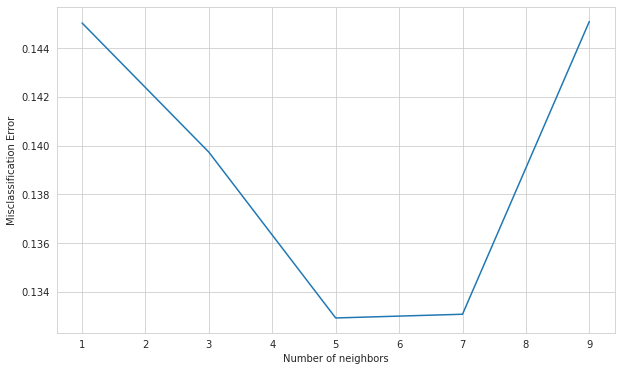

In [82]:
#Misclassification error versus k
MSE = [1-x for x in cv_scores]

#determining the best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is %d ' %optimal_k)

#plot misclassification error versus k

plt.figure(figsize = (10,6))
plt.plot(neighbors, MSE)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()